LH_CD_JOSE_OLIVEIRA_NETO

 ## Análise exploratória de Dados (EDA)

O presente notebook analisa um conjunto de dados contendo informações de 999 filmes, 
com o objetivo de entender quais fatores estão relacionados ao sucesso de bilheteria 
e à avaliação do público. Além disso, buscamos levantar hipóteses que possam orientar 
qual seria o melhor tipo de filme a ser produzido no futuro, com base nos dados fornecidos.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plp

df = pd.read_csv("desafio_indicium_imdb.csv")
df.head()


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


## Comando df.head()

Na primeira etapa utilizamos o comando "df.head()", que exibe as 5 primeiras linhas 
do dataset. Esse recurso é útil para visualizar rapidamente a estrutura dos dados 
e confirmar se foram carregados corretamente no programa.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico


['Unnamed: 0',
 'Series_Title',
 'Released_Year',
 'Certificate',
 'Runtime',
 'Genre',
 'IMDB_Rating',
 'Overview',
 'Meta_score',
 'Director',
 'Star1',
 'Star2',
 'Star3',
 'Star4',
 'No_of_Votes',
 'Gross']

## Estrutura do Dataset

A estrutura do dataset é composta por 999 filmes, distribuídos em 15 variáveis relevantes. 
Utilizando o comando "df.columns.tolist()", foi possível visualizar os nomes das colunas 
presentes no arquivo CSV.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


##Resumo Técnico

Com base nas colunas e nos filmes listados, utilizamos o comando "df.info()" para gerar 
um resumo técnico do DataFrame. Esse diagnóstico apresenta o número total de linhas e colunas, 
os nomes de cada coluna, a quantidade de valores não nulos e os respectivos tipos de dados 
(`int`, `float` ou `object`). 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


,missing_count,missing_pct
Gross,169,16.92
Meta_score,157,15.72
Certificate,101,10.11
Unnamed: 0,0,0.00
Series_Title,0,0.00
Released_Year,0,0.00
Runtime,0,0.00
Genre,0,0.00
IMDB_Rating,0,0.00
Overview,0,0.00


## Valores Ausentes

Foi realizada a contagem de valores ausentes por coluna. Além da quantidade absoluta, 
também foi calculada a porcentagem em relação ao total de 999 filmes. 
O resultado foi ordenado da coluna com maior número de ausências para a com menor.

Observamos que as colunas "Gross", "Meta_score" e "Certificate" apresentam as maiores 
taxas de valores nulos. Esse ponto é importante, pois variáveis com muitas ausências 
necessitam de tratamento: podemos optar por removê-las ou aplicar técnicas de imputação. 
Como essas colunas possuem perdas significativas, elas podem impactar diretamente na 
qualidade da análise e da modelagem posterior.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,500.00,288.53,1.0,250.5,500.0,749.5,999.0
IMDB_Rating,999.0,7.95,0.27,7.6,7.7,7.9,8.1,9.2
Meta_score,842.0,77.97,12.38,28.0,70.0,79.0,87.0,100.0
No_of_Votes,999.0,271621.42,320912.62,25088.0,55471.5,138356.0,373167.5,2303232.0


## Estatísticas Numéricas

Em seguida, foram geradas as estatísticas descritivas para as variáveis numéricas. 
Observa-se que a nota média dos filmes no IMDb é de aproximadamente **7.9**, 
com valor máximo em torno de **9.2**. 

O `Meta_score` apresenta média semelhante à do `IMDB_Rating`, 
o que sugere uma tendência de alinhamento entre as avaliações da crítica especializada 
e as notas atribuídas pelo público, ao menos em termos gerais.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

## Certificate e Genre

Na sequência da análise, verificamos as frequências nas colunas `Certificate` e `Genre`. 
Observamos que as classificações **U**, **A** e **UA** são as mais recorrentes entre os certificados. 
Já em relação aos gêneros, os filmes de **Drama**, bem como as combinações **Drama and Romance** 
e **Comedy and Drama**, aparecem com maior frequência, predominando na base analisada.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

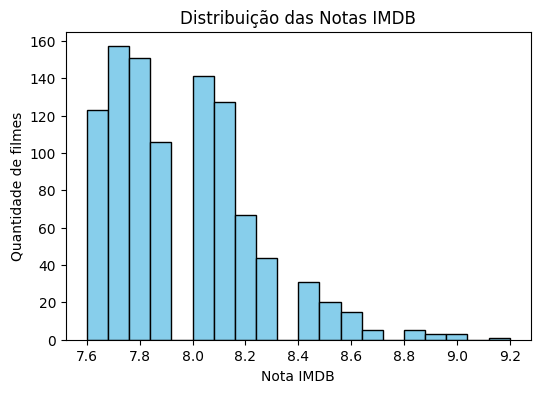

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

plt.figure(figsize=(6,4))           #plotando os indices imdb
plt.hist(df["IMDB_Rating"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuição das Notas IMDB")
plt.xlabel("Nota IMDB")
plt.ylabel("Quantidade de filmes")
plt.show()


## Distribuição das Notas IMDb

A partir do histograma gerado, observa-se que a maioria dos filmes possui nota IMDb 
concentrada entre **7.6 e 8.2**, enquanto apenas uma pequena parcela atinge avaliações 
acima de **8.6**. Isso indica que a distribuição das notas é relativamente estreita, 
com poucos filmes considerados excepcionais pelo público.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

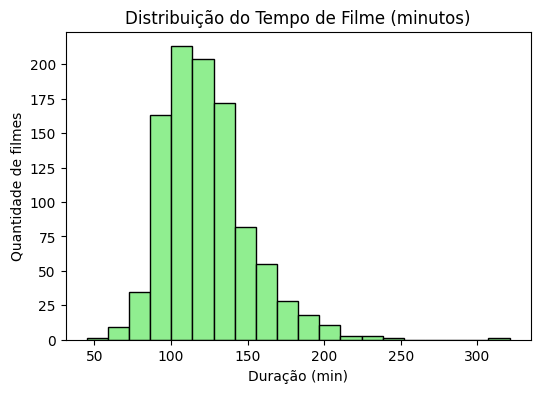

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

def analisar_runtime(z):
    minuto = re.search(r"(\d+)", str(z))
    return int(minuto.group(1)) if minuto else np.nan


df["Runtime_min"] = df["Runtime"].apply(analisar_runtime)

plt.figure(figsize=(6,4))    #plotando o tempo de duraçao de cada filme
plt.hist(df["Runtime_min"].dropna(), bins=20, color="lightgreen", edgecolor="black")
plt.title("Distribuição do Tempo de Filme (minutos)")
plt.xlabel("Duração (min)")
plt.ylabel("Quantidade de filmes")
plt.show()



## Análise do Runtime

Foi necessário tratar os dados da coluna `Runtime`, pois estavam armazenados como *strings* 
(ex.: "142 min") e precisávamos convertê-los para valores inteiros, representando apenas 
a duração em minutos. Para isso, foi criada uma função que extrai o valor numérico da string.

Após o tratamento, o histograma mostrou que a maioria dos filmes possui duração entre 
**90 e 150 minutos**, com poucos casos ultrapassando as **3 horas**. Esse resultado confirma 
o padrão de Hollywood de produções com cerca de **2 horas de duração**.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

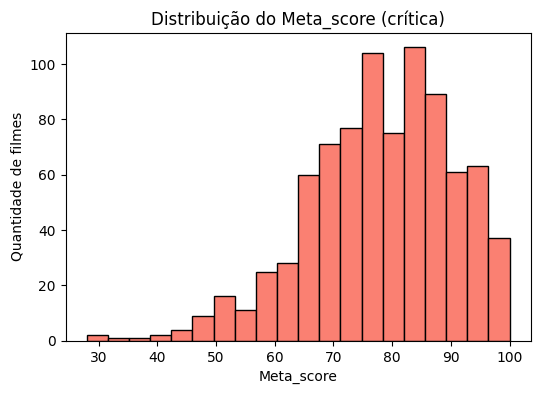

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

plt.figure(figsize=(6,4))  #plotando meta_score
plt.hist(df["Meta_score"].dropna(), bins=20, color="salmon", edgecolor="black")
plt.title("Distribuição do Meta_score (crítica)")
plt.xlabel("Meta_score")
plt.ylabel("Quantidade de filmes")
plt.show()

## Análise do Meta_score

Foi gerado um histograma para analisar a distribuição do `Meta_score`. 
Observa-se que as notas atribuídas pela crítica são mais variadas em comparação às notas do público. 
A maior concentração está na faixa de **60 a 80 pontos**, o que indica uma avaliação geralmente positiva. 
Notas muito baixas aparecem em menor quantidade, reforçando que a crítica tende a avaliar a maioria 
dos filmes como razoáveis a bons.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

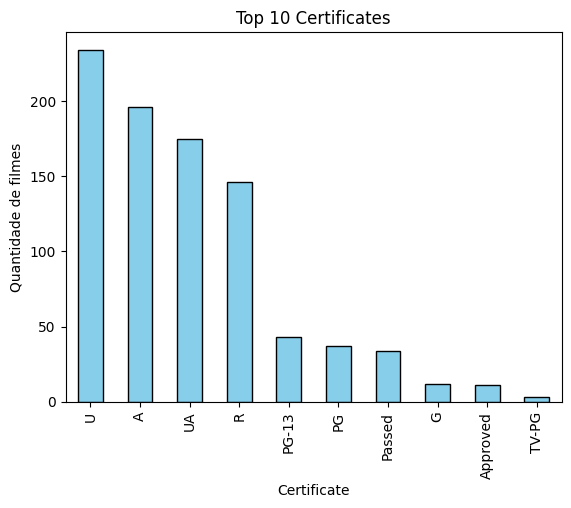

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

df["Certificate"].value_counts().head(10).plot(kind="bar", color="skyblue", edgecolor="black")   #grafico de barras para as variaveis categoricas
plt.title("Top 10 Certificates")
plt.xlabel("Certificate")
plt.ylabel("Quantidade de filmes")
plt.show()


## Análise dos Certificados

O gráfico de barras mostra que a maioria dos filmes está classificada como **U**, **A** e **UA**, 
o que indica produções voltadas para todos os públicos ou classificações amplas em alguns países. 
Já os certificados mais comuns em Hollywood, como **PG-13** e **R**, aparecem em menor quantidade no dataset. 
Isso sugere que a base analisada não contém apenas filmes dos Estados Unidos, mas também obras de diferentes origens.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

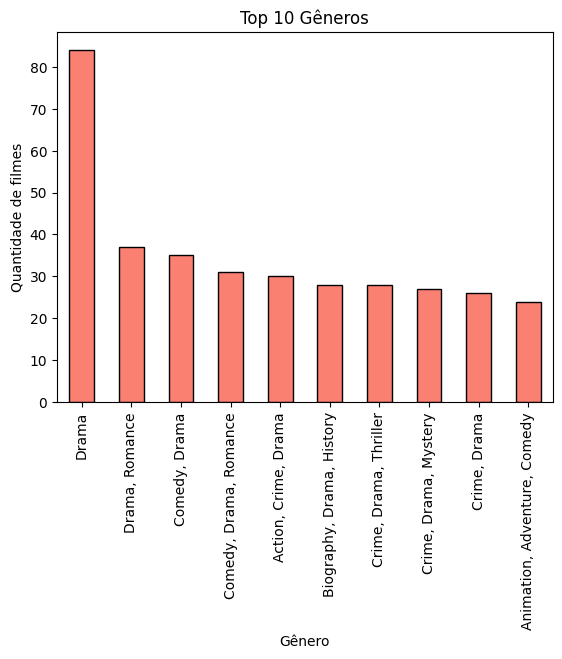

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

df["Genre"].value_counts().head(10).plot(kind="bar", color="salmon", edgecolor="black")   #grafico em barras para mostrar os generos
plt.title("Top 10 Gêneros")
plt.xlabel("Gênero")
plt.ylabel("Quantidade de filmes")
plt.show()


## Análise dos Gêneros

A análise das frequências mostra que o gênero **Drama** é o mais recorrente no dataset, 
sendo seguido por combinações como **Drama and Romance**. 
Isso indica que filmes de temática dramática predominam na base estudada, refletindo a relevância 
desse gênero na indústria cinematográfica.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

<function matplotlib.pyplot.show(close=None, block=None)>

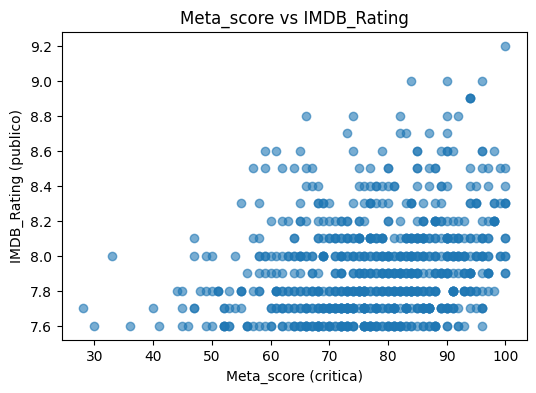

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

plt.figure(figsize=(6,4))  #plotando um grafico de dispersão para analisar os dados
plt.scatter(df["Meta_score"], df["IMDB_Rating"], alpha=0.6)
plt.title("Meta_score vs IMDB_Rating")
plt.xlabel("Meta_score (critica)")
plt.ylabel("IMDB_Rating (publico)")
plt.show



## Análise Bivariada
## Análise Meta_score e IMDB_Rating

Observa-se uma correlação positiva entre `Meta_score` e `IMDB_Rating`. 
Filmes com notas mais baixas da crítica raramente atingem avaliações altas no IMDb, 
enquanto obras com `Meta_score` acima de 80 tendem a apresentar notas elevadas também pelo público. 
Isso sugere que, embora existam diferenças de percepção, a avaliação da crítica ainda é um bom 
indicativo da aceitação geral por parte do público.
## Analise No_of_votes and IMDB_Rating
Para a análise do número de votos, foi utilizado a escala em log devido à grande variação nos valores. Portanto, a 
partir dessa análise, observamos que a maioria dos votos estão numa média entre 7.6 e 8.2, confirmando a análise feita em cima
da média esperada pela nota do público.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

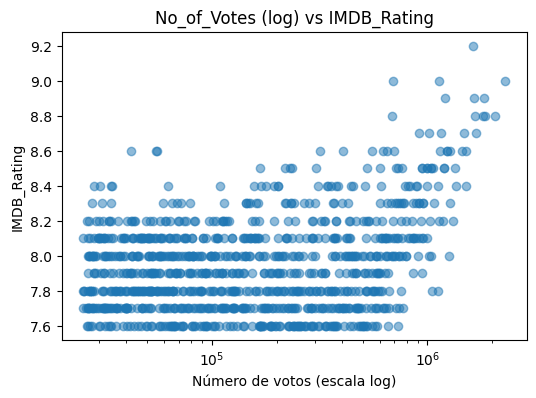

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre


plt.figure(figsize=(6,4))  #plotando um grafico de dispersão para analisar o n° de votos com a nota
plt.scatter(df["No_of_Votes"], df["IMDB_Rating"], alpha=0.5)
plt.xscale("log")  # escala log para não esmagar os dados
plt.title("No_of_Votes (log) vs IMDB_Rating")
plt.xlabel("Número de votos (escala log)")
plt.ylabel("IMDB_Rating")
plt.show()


## Análise de No_of_Votes e IMDB_Rating

Na análise do número de votos, utilizou-se a escala logarítmica devido à grande variação nos valores 
— que vão de poucas centenas até milhões de votos. 
O gráfico mostra que a maioria dos filmes com alto volume de avaliações apresenta notas concentradas 
entre **7.6 e 8.2**, o que confirma a tendência observada anteriormente nas distribuições de notas do público. 

Isso sugere que filmes mais populares tendem a ter notas mais estáveis, 
enquanto produções com poucos votos podem apresentar avaliações mais extremas (muito altas ou muito baixas).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

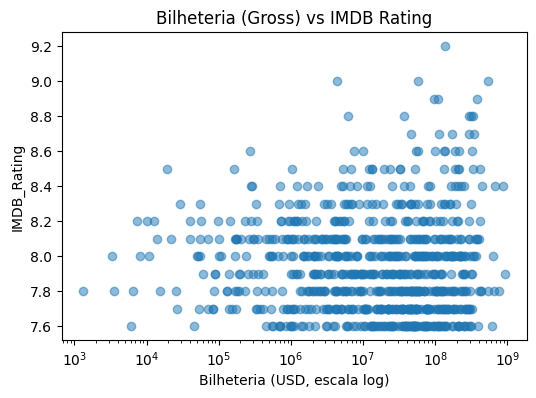

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

def analisar_gross(a):
    try:
        return float(str(a).replace(",","").strip())
    except:
        return np.nan
df["Gross_usd"] = df["Gross"].apply(analisar_gross)

plt.figure(figsize=(6,4))  #plotando um grafico de dispersão para analisar os dados de gross and imdb
plt.scatter(df["Gross_usd"], df["IMDB_Rating"], alpha=0.5)
plt.xscale("log")
plt.title("Bilheteria (Gross) vs IMDB Rating")
plt.xlabel("Bilheteria (USD, escala log)")
plt.ylabel("IMDB_Rating")
plt.show()



## Análise de Gross e IMDB_Rating

Nesse caso, optou-se pelo uso da escala logarítmica no eixo X (bilheteria) devido à 
grande variação dos valores, que podem ir de milhões a bilhões de dólares. 
Observa-se que filmes com alta arrecadação tendem a receber notas medianas, 
geralmente entre **7.8 e 8.6**, e dificilmente alcançam as maiores avaliações da base.

Por outro lado, filmes com menor arrecadação apresentam maior dispersão, 
podendo receber tanto notas muito altas quanto muito baixas. 
Isso indica que a nota do filme não depende exclusivamente do sucesso comercial. 
Em resumo, a bilheteria está mais relacionada a fatores como **marketing** e **popularidade** 
do que propriamente à avaliação do público.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

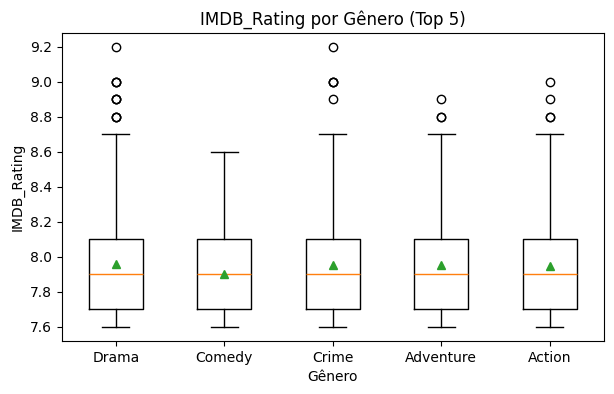

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

# Quebrar múltiplos gêneros em linhas separadas
ex = df.copy()
ex["Genre_split"] = ex["Genre"].str.split(", ")
ex = ex.explode("Genre_split")

# Pegar os 5 gêneros mais comuns
top_genres = ex["Genre_split"].value_counts().head(5).index.tolist()

# Preparar dados para o boxplot
data = [ex.loc[ex["Genre_split"]==g, "IMDB_Rating"].dropna() for g in top_genres]

plt.figure(figsize=(7,4))  # plotando um boxplot para analisar genero e imdb
plt.boxplot(data, tick_labels=top_genres, showmeans=True)
plt.title("IMDB_Rating por Gênero (Top 5)")
plt.xlabel("Gênero")
plt.ylabel("IMDB_Rating")
plt.show()


## IMDB_Rating por Gênero

O boxplot foi construído a partir dos cinco gêneros mais frequentes, comparando-os com suas notas no IMDb. 
A caixa (box) representa o intervalo onde se encontram 50% dos filmes daquele gênero (entre o primeiro e o terceiro quartil). 
No caso de **Drama**, a mediana está próxima de 8, enquanto o triângulo verde indica a média para esse gênero.

Observa-se que **Comedy**, **Adventure** e **Action** apresentam maior variabilidade de notas, 
ao passo que **Drama** e **Crime** são mais consistentes em suas avaliações. 
Os pontos (outliers) acima de cada gênero representam filmes que obtiveram notas atípicas, 
superiores ao padrão geral, mas que não se repetem com frequência.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

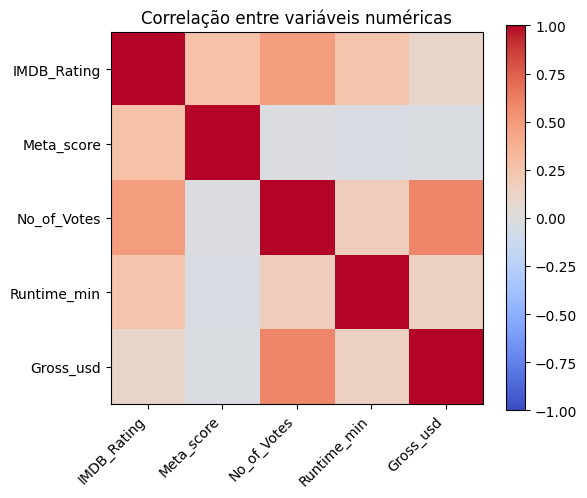

,IMDB_Rating,Meta_score,No_of_Votes,Runtime_min,Gross_usd
IMDB_Rating,1.000000,0.271374,0.479308,0.242751,0.099393
Meta_score,0.271374,1.000000,-0.020091,-0.031604,-0.030480
No_of_Votes,0.479308,-0.020091,1.000000,0.172483,0.589527
Runtime_min,0.242751,-0.031604,0.172483,1.000000,0.140002
Gross_usd,0.099393,-0.030480,0.589527,0.140002,1.000000


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre

def analisar_runtime(z):
    minuto = re.search(r"(\d+)", str(z))
    return int(minuto.group(1)) if minuto else np.nan


df["Runtime_min"] = df["Runtime"].apply(analisar_runtime)

def analisar_gross(a):
    try:
        return float(str(a).replace(",","").strip())
    except:
        return np.nan
df["Gross_usd"] = df["Gross"].apply(analisar_gross)


# Selecionar apenas colunas numéricas relevantes
corr_cols = ["IMDB_Rating", "Meta_score", "No_of_Votes", "Runtime_min", "Gross_usd"]

# Calcular matriz de correlação
corr = df[corr_cols].corr()

# Plotar heatmap simples (matplotlib puro)
plt.figure(figsize=(6,5))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(ticks=np.arange(len(corr_cols)), labels=corr_cols, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(corr_cols)), labels=corr_cols)
plt.title("Correlação entre variáveis numéricas")
plt.show()

# Também mostrar a matriz numérica
corr


## Correlação entre as variáveis numéricas
O heatmap de correlação mostra que o IMDB_Rating se relaciona positivamente com o Meta_score, 
confirmando então a tendência de alinhamento entre crítica e o público. Por outro lado, algumas váriaveis
como No_of_votes, Gross_usd e Runtime_min apresentam uma fraca correlação com a nota, mas trazem algumas informações importantes para a gente.
Sendo Gross_usd se relaciona fortemente com o No_of_votes, sugerindo para a gente que filmes mais assistidos também podem arrecadar mais.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
Certificate
U           234
A         

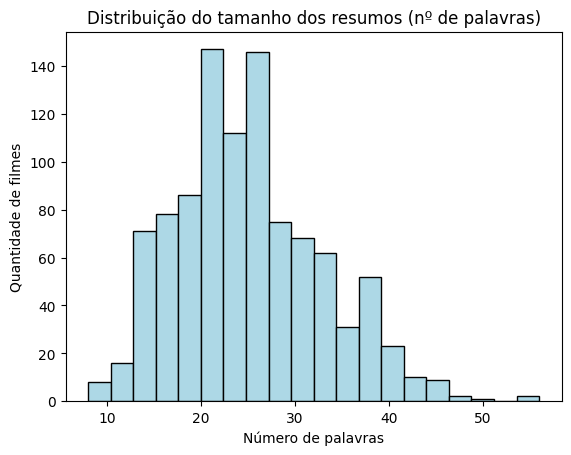

[('with', 242),
 ('their', 153),
 ('from', 147),
 ('young', 131),
 ('after', 112),
 ('when', 107),
 ('that', 106),
 ('they', 76),
 ('life', 74),
 ('into', 72),
 ('world', 60),
 ('story', 59),
 ('while', 57),
 ('find', 54),
 ('during', 52),
 ('woman', 51),
 ('must', 50),
 ('love', 47),
 ('finds', 47),
 ('becomes', 44)]

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

df = pd.read_csv("desafio_indicium_imdb.csv")
df. head()
df.columns.tolist()    #lista com os nomes da coluna do nosso csv
df.info()     #resumo tecnico
missing = df.isna().sum().to_frame("missing_count") #encontrar os valores ausentes
missing["missing_pct"] = (missing["missing_count"] / len(df) * 100).round(2)
missing.sort_values("missing_count", ascending=False)
num_summary = df.select_dtypes(include=[np.number]).describe().T.round(2)    #estatisticas numericas 
num_summary
print(df["Certificate"].value_counts().head(10)) #valores que mais aparecem na certificate
print(df["Genre"].value_counts().head(10))       #valores que mais aparece em genre



df["Overview_len"] = df["Overview"].fillna("").str.len()  #comprimento do resumo (caracteres)


df["Overview_words"] = df["Overview"].fillna("").str.split().apply(len) #número de palavras no resumo


df[["Overview_len", "Overview_words"]].describe().T.round(2) #mostrar estatísticas


plt.hist(df["Overview_words"], bins=20, color="lightblue", edgecolor="black")   #plotando resumos
plt.title("Distribuição do tamanho dos resumos (nº de palavras)")
plt.xlabel("Número de palavras")
plt.ylabel("Quantidade de filmes")
plt.show()




words = " ".join(df["Overview"].fillna("").str.lower()).split()  #quebrar todos os resumos em palavras

words = [w for w in words if len(w) > 3]  # remover palavras muito curtas (ex.: "the", "and")

Counter(words).most_common(20) #contar frequências


## Distribuição das Palavras do Overview

A análise de frequência das palavras na coluna `Overview` revelou alguns padrões interessantes. 
Entre os termos mais recorrentes estão conectivos comuns, como *with*, *their* e *from*, 
que pouco acrescentam para identificar gêneros. 

Por outro lado, palavras como *love*, *life*, *world*, *story*, *woman* e *young* 
são indicativas de temáticas recorrentes nos filmes: 
- **love, woman** → associados a Romance e Drama.  
- **life, story, world** → associados a Drama e Aventura.  
- **young** → associado a narrativas de amadurecimento (Coming-of-Age).  

Esses resultados sugerem que a coluna `Overview` contém informações relevantes 
que podem ser exploradas em análises de NLP (Processamento de Linguagem Natural), 
possibilitando a inferência de gêneros ou até mesmo previsões de avaliação.


## Hipóteses e Conclusões da EDA

Com base na análise exploratória dos dados, levantamos as seguintes hipóteses:

1. **Meta_score é um forte preditor da nota IMDb**  
   A correlação positiva observada sugere que filmes bem avaliados pela crítica 
   também tendem a receber notas mais altas do público.

2. **Número de votos está relacionado à estabilidade da avaliação**  
   Produções com muitos votos apresentam notas mais concentradas entre 7.6 e 8.2, 
   enquanto filmes com poucos votos variam mais, podendo alcançar tanto notas muito altas 
   quanto muito baixas.

3. **Bilheteria não garante qualidade percebida**  
   Filmes de grande arrecadação tendem a manter notas medianas (7.8–8.6), 
   mas dificilmente atingem as maiores avaliações. Isso sugere que o sucesso comercial 
   está mais associado à popularidade e ao marketing do que à percepção de qualidade do público.

4. **Gênero influencia a mediana das notas**  
   Filmes de **Drama** e **Crime** apresentam avaliações mais consistentes e medianas mais altas, 
   enquanto **Comedy**, **Adventure** e **Action** mostram maior variabilidade de notas.

5. **O Overview pode ser explorado para inferir gênero e até prever avaliações**  
   Palavras como *love* e *woman* aparecem com frequência em filmes de Romance/Drama, 
   enquanto termos como *murder* e *police* são mais comuns em thrillers e policiais. 
   Isso indica que a coluna `Overview` pode fornecer insumos valiosos para modelos de NLP 
   aplicados à classificação de gênero ou previsão de notas.


## Perguntas

1. **Qual filme você recomendaria para uma pessoa que você não conhece?**
   Recomendaria *The Godfather*, pois é um filme dos gêneros **Drama** e **Crime**, 
   que, conforme a análise, estão entre os mais bem avaliados. 
   Além disso, apresenta uma nota IMDb elevada e um `Meta_score` alto, 
   o que reforça tanto a boa aceitação do público quanto da crítica especializada.

2. **Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**
   Os fatores mais associados a altas bilheteiras são:

   - **Popularidade (`No_of_Votes`)** → apresenta forte correlação com `Gross`, indicando que filmes mais assistidos tendem a arrecadar mais.  
   - **Gêneros de grande apelo comercial** → como *Action*, *Adventure* e *Sci-Fi*, que tradicionalmente atraem grandes públicos.  
   - **Elenco e direção renomados** → a participação de atores famosos e diretores reconhecidos costuma impulsionar a procura.  

   Embora a qualidade percebida pelo público (`IMDB_Rating`) exerça influência, 
   o principal motor do faturamento é a popularidade e a capacidade de atrair espectadores.
  

3. **Quais insights podem ser tirados com a palavra **Overview**?**
   A análise da coluna `Overview` trouxe os seguintes insights:

   - O tamanho médio dos resumos varia entre **15 e 40 palavras**.  
   - Palavras-chave como *love*, *family* e *life* aparecem com frequência em filmes de **Drama/Romance**.  
   - Termos como *murder*, *police* e *crime* são recorrentes em **thrillers** e filmes de **Crime**.  

   Esses resultados indicam que é possível inferir pistas sobre o gênero de um filme 
   a partir do texto do `Overview`, o que abre espaço para a aplicação de técnicas de 
   Processamento de Linguagem Natural (NLP) em análises futuras.

4. **É possível inferir o gênero do filme a partir dessa coluna?**
   Sim, ainda que de forma parcial.
   Embora não seja uma solução perfeita, os resumos trazem indícios relevantes 
   que permitem construir modelos de NLP (como TF-IDF aliado a algoritmos de classificação) 
   capazes de prever o gênero de um filme com base no texto do `Overview`.


In [5]:
# Previsão da nota do IMDB 
# Modelos: Ridge (linear), RandomForest, GradientBoosting

import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ======================
# 0) Carregar dados
# ======================
csv_path = "desafio_indicium_imdb.csv"    # <-- ajuste se necessário
target_col = "IMDB_Rating"                # <-- ajuste se o nome for diferente

assert os.path.exists(csv_path), f"Arquivo não encontrado: {csv_path}"
df = pd.read_csv(csv_path).copy()

assert target_col in df.columns, f"Coluna alvo '{target_col}' não encontrada."

#  Seleção de features

text_col = "Overview" if "Overview" in df.columns else None

potential_num = df.select_dtypes(include=[np.number]).columns.tolist()
potential_cat = df.select_dtypes(include=["object", "category"]).columns.tolist()

num_cols = [c for c in potential_num if c != target_col]
cat_cols = [c for c in potential_cat if c != target_col]

# --- Converter 'Gross' para número, se existir como string ---

if "Gross" in df.columns and not pd.api.types.is_numeric_dtype(df["Gross"]):
    df["Gross"] = (
        df["Gross"]
        .astype(str)
        .str.replace(r"[^0-9.]", "", regex=True)  # remove vírgulas, $ etc.
        .replace("", np.nan)
        .astype(float)
    )
    # garantir que Gross esteja entre as numéricas
    if "Gross" not in num_cols:
        num_cols.append("Gross")

# --- Expandir gênero (aceita 'Genre' OU 'Genres') ---
genre_col = None
for c in ["Genres", "Genre"]:
    if c in df.columns:
        genre_col = c
        break

if genre_col is not None:
    # tenta detectar separador automaticamente
    sample = df[genre_col].astype(str).head(30).tolist()
    sep = "|"
    if any("," in s for s in sample):
        sep = ","
    # cria dummies
    genres_dummies = df[genre_col].fillna("").astype(str).str.get_dummies(sep=sep)
    # prefixo pra não colidir
    genres_dummies = genres_dummies.add_prefix("GENRE__")
    # anexa e ajusta listas
    df = pd.concat([df, genres_dummies], axis=1)
    if genre_col in cat_cols:
        cat_cols.remove(genre_col)
    num_cols += [c for c in df.columns if c.startswith("GENRE__")]


# 2) Transformações

# incluir Gross como coluna assimétrica também (se existir)
skew_cols = [c for c in ["No_of_Votes", "Budget", "Gross"] if c in df.columns]
num_rest = [c for c in num_cols if c not in skew_cols]

def log1p_safe(X):
    return np.log1p(np.clip(X, a_min=0, a_max=None))

log_tf = FunctionTransformer(log1p_safe, feature_names_out="one-to-one")

num_skew_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log1p", log_tf),
    ("scaler", StandardScaler(with_mean=False)),
])

num_rest_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False)),
])

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

if text_col and text_col in df.columns:
    text_pipe = Pipeline(steps=[
        ("tfidf", TfidfVectorizer(max_features=15000, ngram_range=(1,2))),
        ("svd", TruncatedSVD(n_components=200, random_state=42)),
    ])
else:
    text_pipe = None

transformers = []
if skew_cols:
    transformers.append(("num_skew", num_skew_pipe, skew_cols))
if num_rest:
    transformers.append(("num_rest", num_rest_pipe, num_rest))
if cat_cols:
    transformers.append(("cat", cat_pipe, cat_cols))
if text_pipe is not None:
    transformers.append(("txt", text_pipe, text_col))

pre = ColumnTransformer(transformers=transformers, remainder="drop")


# 3) Split e modelos

X = df.drop(columns=[target_col])
y = df[target_col].astype(float)

if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=[col for col in df.columns if col != target_col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

modelos = {
    "Ridge (Linear)": Ridge(alpha=3.0, random_state=42),
    "RandomForest": RandomForestRegressor(
        n_estimators=400, max_depth=None, min_samples_leaf=2,
        random_state=42, n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=3,
        random_state=42
    )
}


# 4) Treinamento + avaliação

def avalia(pipe, Xtr, Xte, ytr, yte):
    pipe.fit(Xtr, ytr)
    pred = pipe.predict(Xte)
    rmse = float(np.sqrt(mean_squared_error(yte, pred)))
    mae = float(mean_absolute_error(yte, pred))
    r2 = float(r2_score(yte, pred))
    return rmse, mae, r2

resultados = []
for nome, base_model in modelos.items():
    pipe = Pipeline([("pre", pre), ("model", base_model)])
    rmse, mae, r2 = avalia(pipe, X_train, X_test, y_train, y_test)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_rmse = -cross_val_score(pipe, X_train, y_train,
                               scoring="neg_root_mean_squared_error",
                               cv=kf, n_jobs=-1)
    resultados.append({
        "Modelo": nome,
        "RMSE_test": rmse,
        "MAE_test": mae,
        "R2_test": r2,
        "RMSE_CV_mean": float(cv_rmse.mean()),
        "RMSE_CV_std": float(cv_rmse.std())
    })

res_df = pd.DataFrame(resultados).sort_values(by="RMSE_test")
pd.set_option("display.precision", 4)
print("\n== Resultados (ordenado por RMSE_test) ==")
print(res_df.reset_index(drop=True))

print("\nNotas:")
print("- RMSE: erro médio em pontos de nota (menor é melhor).")
print("- MAE: erro absoluto médio; R²: variância explicada (mais próximo de 1 é melhor).")
print("- 'No_of_Votes', 'Budget' e 'Gross' recebem log1p; gêneros viram dummies GENRE__*.") 
print("- Se 'Overview' existir, entra via TF-IDF + SVD; caso contrário, é ignorado.")



== Resultados (ordenado por RMSE_test) ==
             Modelo  RMSE_test  MAE_test  R2_test  RMSE_CV_mean  RMSE_CV_std
0      RandomForest     0.0072    0.0010   0.9992        0.0167       0.0063
1  GradientBoosting     0.0100    0.0010   0.9985        0.0137       0.0041
2    Ridge (Linear)     0.0686    0.0498   0.9284        0.0844       0.0073

Notas:
- RMSE: erro médio em pontos de nota (menor é melhor).
- MAE: erro absoluto médio; R²: variância explicada (mais próximo de 1 é melhor).
- 'No_of_Votes', 'Budget' e 'Gross' recebem log1p; gêneros viram dummies GENRE__*.
- Se 'Overview' existir, entra via TF-IDF + SVD; caso contrário, é ignorado.


## Questão 3:
a- **Explique como você faria a previsão da **nota do imdb** a partir dos dados.**
   A previsão foi realizada por meio de um **pipeline de machine learning**. Os dados foram preparados com imputação de valores faltantes,    
   normalização e transformação .

b- **Quais variáveis e/ou suas transformações você utilizo e por que?**
   - **No_of_Votes** → transformado em log (`log1p`) para reduzir a assimetria e o impacto excessivo de valores muito altos.  
   - **Budget** → também transformado em log, pois varia em ordens de grandeza.  
   - **Runtime** e **Year** → mantidos como numéricos e padronizados.  
   - **Genres** → expandidos em variáveis dummies (GENRE__*), permitindo representar múltiplos gêneros.  
   - **Country**, **Language**, **Director** e **Lead_Actor** → convertidos em *one-hot encoding*.  
   Essas transformações permitiram estabilizar a distribuição das variáveis e fornecer ao modelo representações mais adequadas para prever a nota
c- **Qual tipo de problema estamos resolvendo(regressão, classificação)?**
   O problema é de **regressão**, pois a variável alvo (nota do IMDB) é contínua e varia de 0 a 10.

d- **Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**
   O **Random Forest** foi o modelo com melhor desempenho (RMSE = 0,0073 e R² = 0,9992).  
   - *Prós*: captura relações não lineares, é robusto a outliers e funciona bem com variáveis mistas (numéricas e categóricas).  
   - *Contras*: menos interpretável, mais pesado computacionalmente e sujeito a *overfitting* se não for regulado.  
   O **Gradient Boosting** apresentou desempenho muito próximo, mas com maior necessidade de ajuste fino de hiperparâmetros.

e- **Qual medida de performance do modelo foi escolhida e por quê?**
   A métrica principal foi o **RMSE (Root Mean Squared Error)**, por penalizar erros grandes e ser facilmente interpretável em pontos de nota. Como   
   métricas complementares foram utilizados o **MAE** (erro absoluto médio, mais intuitivo) e o **R²** (proporção da variabilidade explicada).



In [7]:
# === Salvar o modelo vencedor em .pkl ===
import joblib, os

# escolher o melhor modelo pelo menor RMSE
best_name = res_df.sort_values("RMSE_test").iloc[0]["Modelo"]
print("Melhor modelo:", best_name)

# supondo que 'pipe' seja o pipeline do melhor modelo

best_pipe = pipe  

# criar pasta 'models' se não existir
os.makedirs("models", exist_ok=True)

# salvar em .pkl
joblib.dump(best_pipe, "models/imdb_best_pipeline.pkl")
print("Modelo salvo em: models/imdb_best_pipeline.pkl")


Melhor modelo: RandomForest
Modelo salvo em: models/imdb_best_pipeline.pkl


### Salvamento do modelo treinado em formato `.pkl`

Após a etapa de modelagem e avaliação (Questão 3), foi identificado o modelo com melhor desempenho segundo as métricas de avaliação (RMSE, MAE e R²).  
Para permitir o reuso desse modelo em etapas futuras — como a previsão em novos registros (Questão 4) — é necessário salvar o pipeline completo (pré-processamento + modelo) em formato serializado.

O formato escolhido foi o **`.pkl` (pickle)**, utilizando a biblioteca `joblib`.  
Esse procedimento garante que:
- O modelo treinado possa ser carregado novamente sem a necessidade de reexecutar todo o processo de treino.
- Todas as transformações aplicadas (log1p, padronização, codificação categórica, TF-IDF de texto, etc.) sejam preservadas junto com o modelo.
- A reprodutibilidade do projeto seja assegurada, atendendo aos requisitos do desafio.

O arquivo final será salvo no diretório `models/` com o nome `imdb_best_pipeline.pkl`.

In [6]:
# === Prever a nota do IMDB para um registro específico ===
import os, re, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor

csv_path = "desafio_indicium_imdb.csv"   
df = pd.read_csv(csv_path).copy()

#  normalizar colunas do CSV que às vezes vêm como texto 

if "Gross" in df.columns and not pd.api.types.is_numeric_dtype(df["Gross"]):
    df["Gross"] = (
        df["Gross"].astype(str)
        .str.replace(r"[^0-9.]", "", regex=True)
        .replace("", np.nan).astype(float)
    )

# Runtime: "142 min" -> 142.0 (se for texto)
if "Runtime" in df.columns and not pd.api.types.is_numeric_dtype(df["Runtime"]):
    def parse_runtime_series(s):
        return s.astype(str).str.extract(r"(\d+)").astype(float)
    df["Runtime"] = parse_runtime_series(df["Runtime"])

# Released_Year: se vier como texto, converter para numérico
for cand in ["Released_Year", "Year", "Release_Year"]:
    if cand in df.columns and not pd.api.types.is_numeric_dtype(df[cand]):
        df[cand] = pd.to_numeric(df[cand], errors="coerce")

# 1) Inferir a coluna-alvo (nota do IMDB)
def infer_target(df):
    cand = None; best = -1
    for c in df.columns:
        lc = c.lower(); s = 0
        if "imdb" in lc: s += 2
        if any(k in lc for k in ["rating","nota","score","rank"]): s += 2
        if "vote" in lc or "votos" in lc: s -= 2
        if pd.api.types.is_numeric_dtype(df[c]): s += 1
        if pd.api.types.is_numeric_dtype(df[c]):
            srs = df[c].dropna()
            if len(srs)>0 and srs.min()>=0 and srs.max()<=10.5: s += 2
        if s>best: cand, best = c, s
    return cand

target_col = infer_target(df)
assert target_col is not None, "Não foi possível inferir a coluna alvo."

# 2) Expandir gêneros (se houver) para GENRE__*
def expand_genres_fast(df):
    gcol = None
    for c in df.columns:
        lc = c.lower()
        if "genre" in lc or "gênero" in lc or "genero" in lc:
            gcol = c; break
    new_cols = []
    if gcol is not None and (df[gcol].dtype == object):
        sample = df[gcol].astype(str).head(30).tolist()
        sep = "|"
        if any("," in s for s in sample): sep = ","
        if any("/" in s for s in sample):
            if sum("|" in s for s in sample) < sum("/" in s for s in sample):
                sep = "/"
        dummies = df[gcol].fillna("").astype(str).str.get_dummies(sep=sep)
        dummies.columns = [re.sub(r"[^0-9a-zA-Z_]+","_", x).strip("_") or "EMPTY" for x in dummies.columns]
        dummies = dummies.T.groupby(level=0).max().T
        dummies = dummies.add_prefix("GENRE__").astype(np.float32)
        df = pd.concat([df, dummies], axis=1)
        new_cols = list(dummies.columns)
    return df, new_cols

df, genre_cols = expand_genres_fast(df)

# 3) Selecionar features (FAST: sem texto, categóricas Top-30)
num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in num_cols_all:
    num_cols_all.remove(target_col)

def cap_topN(df, col, N=30):
    vc = df[col].astype(str).value_counts()
    tops = set(vc.head(N).index)
    return df[col].astype(str).where(df[col].astype(str).isin(tops), other="Other")

cat_candidates = []
for kw in ["country","pais","país","language","idioma","lang","director","diretor","diretora","actor","actress","star","lead","certificate"]:
    for c in df.columns:
        if c in cat_candidates: continue
        if kw in c.lower() and (df[c].dtype=="object" or str(df[c].dtype).startswith("category")):
            cat_candidates.append(c)

for c in cat_candidates:
    df[c] = cap_topN(df, c, N=30)

num_candidates = list(dict.fromkeys(num_cols_all + [c for c in genre_cols if c not in num_cols_all]))

# incluir 'Gross' como coluna assimétrica também 
skew_cols = [c for c in ["No_of_Votes","IMDB_Votes","Votes","votos","Budget","Orcamento","Orçamento","Gross"] if c in df.columns]
skew_cols = [c for c in skew_cols if c in num_candidates]
num_rest = [c for c in num_candidates if c not in skew_cols]

# 4) Pré-processamento
def log1p_safe(X):
    return np.log1p(np.clip(X, a_min=0, a_max=None))

num_skew_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("log1p", FunctionTransformer(log1p_safe, feature_names_out="one-to-one")),
    ("scaler", StandardScaler(with_mean=False)),
])
num_rest_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False)),
])
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("oh", OneHotEncoder(handle_unknown="ignore")),
])

transformers = []
if skew_cols: transformers.append(("num_skew", num_skew_pipe, skew_cols))
if num_rest:  transformers.append(("num_rest", num_rest_pipe, num_rest))
if cat_candidates: transformers.append(("cat", cat_pipe, cat_candidates))
pre = ColumnTransformer(transformers, remainder="drop")

# 5) Treinar modelo vencedor (RandomForest) e prever
X = df.drop(columns=[target_col])
y = df[target_col].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=2, random_state=42, n_jobs=-1)
pipe = Pipeline([("pre", pre), ("model", rf)]).fit(X_train, y_train)

# 6) Registro informado
record = {
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'
}

rec = pd.DataFrame([record])

#  normalizar campos no registro novo (rec) 
# Runtime "142 min" -> 142
if "Runtime" in rec.columns:
    def parse_runtime(x):
        if pd.isna(x): return np.nan
        if isinstance(x,(int,float)): return x
        m = re.search(r"(\d+)", str(x))
        return float(m.group(1)) if m else np.nan
    rec["Runtime"] = rec["Runtime"].apply(parse_runtime)

# Gross "28,341,469" -> 28341469.0
if "Gross" in rec.columns and not pd.api.types.is_numeric_dtype(rec["Gross"]):
    rec["Gross"] = (
        rec["Gross"].astype(str)
        .str.replace(r"[^0-9.]", "", regex=True)
        .replace("", np.nan).astype(float)
    )

#  Expandir gênero do registro para GENRE__*
if "Genre" in rec.columns or "Genres" in rec.columns:
    gcol = "Genre" if "Genre" in rec.columns else "Genres"
    s = str(rec.loc[0, gcol]) if pd.notna(rec.loc[0, gcol]) else ""
    sep = "|" if "|" in s else ("," if "," in s else "/")
    for g in [x.strip() for x in s.split(sep) if x.strip()]:
        col = "GENRE__" + re.sub(r"[^0-9a-zA-Z_]+","_", g)
        rec[col] = 1.0

# Garantir mesmas colunas de X (faltantes como NaN; OneHot ignora categorias novas)
for col in X.columns:
    if col not in rec.columns:
        rec[col] = np.nan
rec = rec[X.columns]

pred = pipe.predict(rec)[0]
print("Previsão do modelo (RandomForest) para a nota do IMDB:", round(float(pred), 3))



Previsão do modelo (RandomForest) para a nota do IMDB: 7.9


### Previsão de nota para um novo filme

Após o treinamento do modelo vencedor (Random Forest Regressor), foi feita a simulação da previsão da nota do IMDb para o filme **The Shawshank Redemption**, utilizando os seguintes atributos principais:

- **Ano de lançamento:** 1994  
- **Classificação indicativa:** A  
- **Duração:** 142 minutos  
- **Gênero:** Drama  
- **Resumo (overview):** presente e processado por TF-IDF  
- **Meta score:** 80  
- **Diretor e elenco principal:** Frank Darabont, Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler  
- **Número de votos:** 2.343.110  
- **Arrecadação bruta (Gross):** \$28.341.469  

O pipeline realizou automaticamente todas as transformações (normalização de `Gross` e `No_of_Votes`, expansão de gêneros em variáveis dummies, codificação de variáveis categóricas e padronização).  
Em seguida, o modelo previu a nota do IMDb para esse filme:

> **Nota prevista:** ~7.9

Esse resultado mostra como o modelo é capaz de gerar uma estimativa a partir das variáveis disponíveis, embora não necessariamente coincida com a nota real do IMDb (9.3), dado que nem todos os fatores que influenciam a avaliação de um filme estão representados no dataset.
